In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from collections import Counter

In [2]:
# Markov chain with K states 
K = int(input("Enter the size of the chain: "))
# Input the Transition matrix for the chain
TransitionMatrix = np.zeros((K, K), dtype=float)
# Input the matrix row by row
print("Enter the elements of the transition matrix row by row:")
for i in range(K):
    TransitionMatrix[i] = list(map(float, input(f"Enter elements of row {i + 1}, separated by spaces: ").split()))
    if len(TransitionMatrix[i]) != K:
        raise ValueError("The number of elements in each row must match the matrix size.")

Enter the size of the chain:  3


Enter the elements of the transition matrix row by row:


Enter elements of row 1, separated by spaces:  0.1 0.2 0.7
Enter elements of row 2, separated by spaces:  0.3 0.4 0.3
Enter elements of row 3, separated by spaces:  0.4 0.5 0.1


In [5]:
#Initial State
while True:
    try:
        # Prompt the user for input
        S0 = int(input("Enter the initial state: "))

        # Check if the input is valid
        if S0>=1 and S0<=K:
            break
        else:
            print("The number is not between 1 and the number of states. Please try again.")
    except ValueError:
        print("Invalid input. Please enter a valid number.")
#Number of time steps and number of iterations
rows = int(input("Enter the number of iterations: "))
#time steps
cols = int(input("Enter the number of time steps: "))
FinalStates=[]
MatrixOfStates = np.zeros((rows, cols))
for n in range(0,rows):
    MatrixOfStates[n,0]=S0

Enter the initial state:  2
Enter the number of iterations:  1000
Enter the number of time steps:  15


In [7]:
#Function defining transition
def transit(M,S):
    random_number = rnd.random()
    r=0
    acum=0
    while random_number>acum+M[S-1,r] and r!=K-1:
        acum=acum+M[S-1,r]
        r=r+1
    S=r+1
    return int(S)

In [9]:
for t in range(0,rows):
    S=S0
    for k in range(1, cols):
        S=transit(TransitionMatrix,S)
        MatrixOfStates[t,k]=S
    FinalStates.append(S)

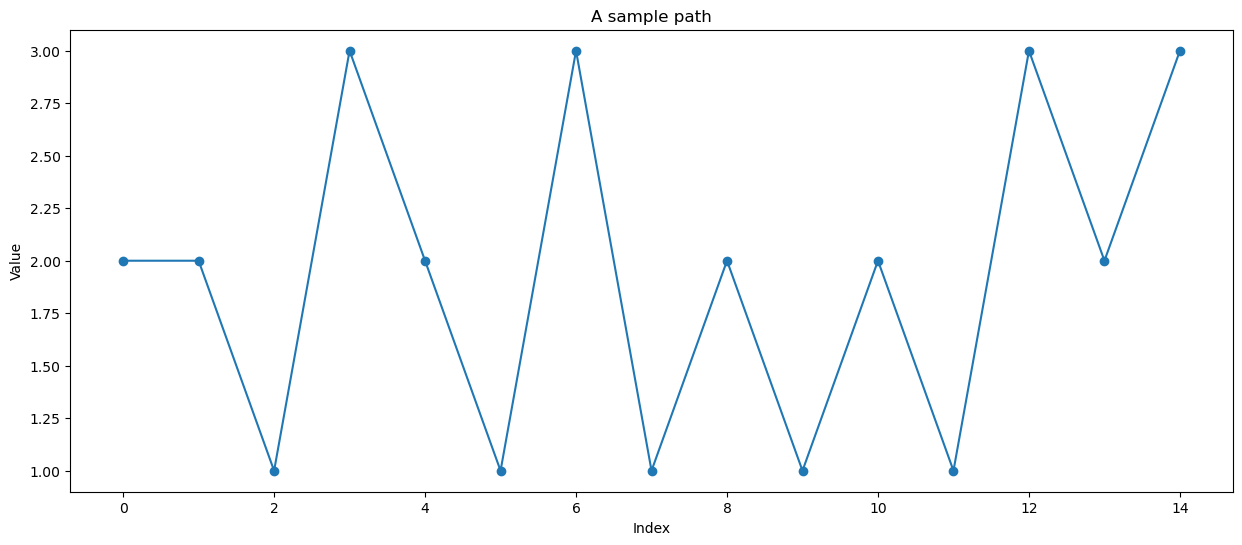

In [11]:
#plot of ith experiment
plt.figure(figsize=(15, 6)) 
plt.plot(list(MatrixOfStates[3,:]), linestyle='-', marker='o')  # '--' specifies a dashed line, 'o' adds markers
#plt.plot(list(MatrixOfStates[1,:]), linestyle='-', marker='o')  # '--' specifies a dashed line, 'o' adds markers
# Add labels and a title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('A sample path')
# Display the plot
plt.show()

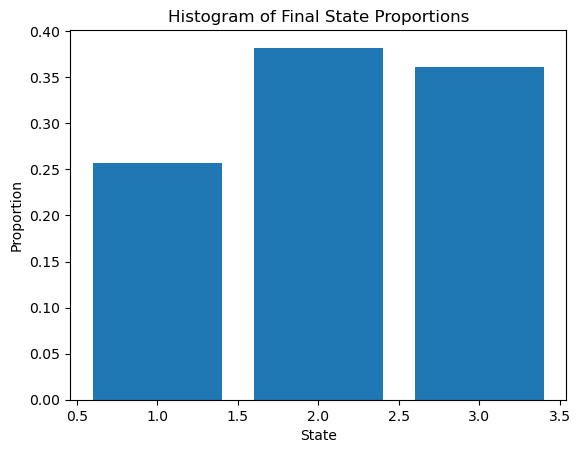

Asymptotic proportions: [0.257, 0.382, 0.361]


In [13]:
# Count the occurrences of each unique value in the final states list
value_counts = Counter(FinalStates)
sorted_counts = dict(sorted(value_counts.items()))

# Get the unique values and their respective proportions
unique_values = list(sorted_counts.keys())
proportions = [count / len(FinalStates) for count in sorted_counts.values()]

# Plot the histogram
plt.bar(unique_values, proportions)

# Add labels and a title
plt.xlabel('State')
plt.ylabel('Proportion')
plt.title('Histogram of Final State Proportions')

# Display the plot
plt.show()
print("Asymptotic proportions:", proportions)